In [129]:
import sklearn
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset, we reserve 20% of data for testing before doing anything. This will be used as unseen data for testing later. It is split using stratify so that the class distribution is preserved in both set.

In [130]:
df = sklearn.datasets.load_breast_cancer(return_X_y=False, as_frame=True)
data = df.data
target = df.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, target, test_size=0.2, stratify=target, random_state=42)




In [131]:
print("Features of data: ", X_train.columns.tolist())
print("Numbers of features: ", X_train.columns.value_counts().sum())

Features of data:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Numbers of features:  30


In [132]:
print("Target distribution:\n")
print("Malignant: ", np.sum(y_train==0))
print("Benign: ", np.sum(y_train==1))
print("Total: ", y_train.shape[0], "\n")

print("Distribution percentages:")
print("Malignant: ", np.sum(y_train==0) / y_train.shape[0] * 100)
print("Benign: ", np.sum(y_train==1) / y_train.shape[0] * 100)

Target distribution:

Malignant:  170
Benign:  285
Total:  455 

Distribution percentages:
Malignant:  37.362637362637365
Benign:  62.637362637362635


#### Distibution
We see that the distribution is about 63% to 37%, meaning that this is not a very imbalanced dataset, but still it is not 50/50, meaning that a model always guessign Benign would get 63% accuracy. Thus we should think to not use accuracy and ROC only to measure the model, but look at other metrics like precision and recall, which is good for inbalanced datasets.

## Analyzing features:

### Without normalization

In [133]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.067213,19.247363,91.557407,648.541099,0.096167,0.103869,0.089193,0.048344,0.180618,0.062820,...,16.177226,25.647297,106.625297,869.026593,0.132329,0.254329,0.276578,0.113904,0.290865,0.083945
std,3.499380,4.405291,24.149231,344.944564,0.013458,0.053522,0.081747,0.038925,0.028074,0.007159,...,4.770020,6.225470,33.195053,552.926912,0.022550,0.159882,0.215937,0.066784,0.064624,0.018408
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.635000,16.000000,74.720000,415.650000,0.086475,0.063750,0.028010,0.020220,0.161750,0.057685,...,13.010000,21.090000,83.715000,513.900000,0.115950,0.145850,0.107900,0.063390,0.249400,0.071835
50%,13.270000,18.820000,85.980000,541.800000,0.095660,0.090970,0.059990,0.032630,0.178100,0.061440,...,14.910000,25.400000,97.590000,683.400000,0.131400,0.211600,0.229800,0.097220,0.281900,0.079930
75%,15.740000,21.710000,103.700000,770.050000,0.104850,0.130100,0.132200,0.073820,0.195300,0.066250,...,18.550000,29.370000,124.950000,1033.500000,0.146200,0.336800,0.385300,0.162500,0.320100,0.092070
max,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


/var/folders/wb/vdxbcw4j5sd6ncmy_df497_w0000gn/T/ipykernel_14651/4001568118.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=X_train, inner="point", scale="width")


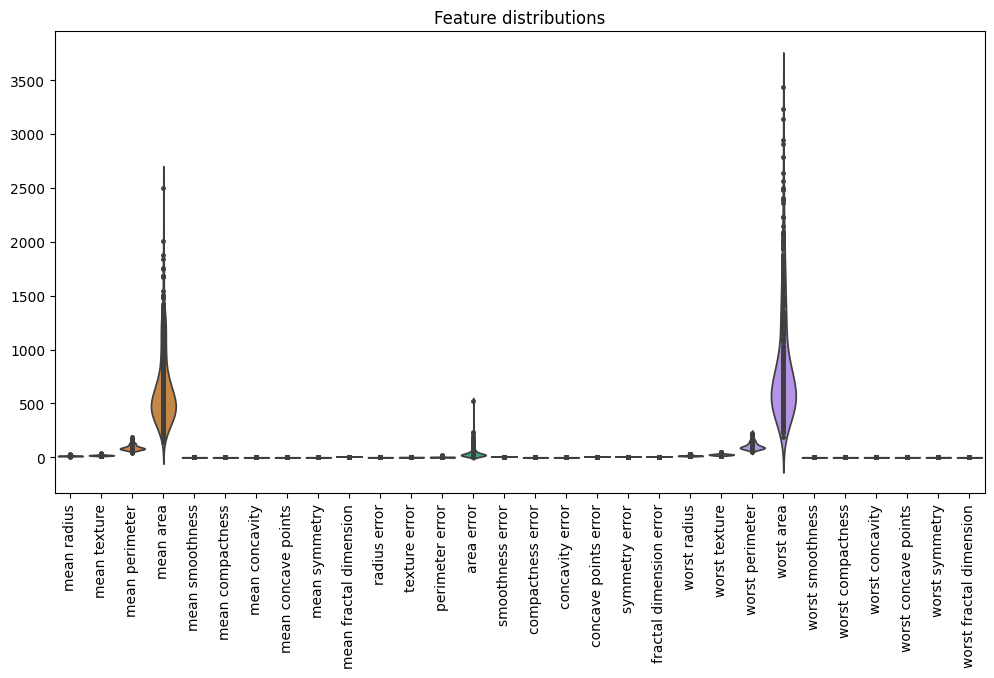

In [134]:

plt.figure(figsize=(12,6))
sns.violinplot(data=X_train, inner="point", scale="width")
plt.xticks(rotation=90)
plt.title("Feature distributions")
plt.show()

Here we see that the feature data scales is widely different, especially mean area and worst area which have the majority of its data far above the others in terms of scale. For some models like Decision trees, this will not matter, but for models like regression and SVM like similar data. This is because the models will put more weight on the large-scale features and can make training unstable.

Create a pipeline for preprocessing numerical data. It includes a imputer, which if any NaN values are delivered to the pipeline it will just fill it with the mean of the column. Then it goes through the standarizer, which scales it to zero mean and unit variance. This is useful for models that work better with normal-like data like linear/logistic regression and SVMs.
Min-max scaling could also be an option

In [135]:
num_pipeline = sklearn.pipeline.Pipeline([
    ("impute", sklearn.impute.SimpleImputer(strategy="median")),
    ("standarize", sklearn.preprocessing.StandardScaler())
])

X_train_scaled = num_pipeline.fit_transform(X_train)
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns, 
    index=X_train.index      
)



In [136]:
X_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-2.928061e-16,6.246530e-16,-1.629954e-16,-1.717796e-16,6.246530e-17,-2.088683e-16,-1.561632e-17,6.636938e-17,-2.928061e-16,8.735381e-16,...,4.157846e-16,-3.123265e-17,-2.557173e-16,2.342449e-17,4.714178e-16,-1.952040e-16,1.444510e-16,-2.732857e-17,-1.756836e-16,1.756836e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.027220e+00,-2.167362e+00,-1.980187e+00,-1.465734e+00,-2.503730e+00,-1.580330e+00,-1.092292e+00,-1.243358e+00,-2.660791e+00,-1.798182e+00,...,-1.730874e+00,-2.191368e+00,-1.695348e+00,-1.238101e+00,-2.715107e+00,-1.421602e+00,-1.282241e+00,-1.707442e+00,-2.081459e+00,-1.571972e+00
25%,-6.958063e-01,-7.379620e-01,-6.979907e-01,-6.758983e-01,-7.210063e-01,-7.504076e-01,-7.492716e-01,-7.233200e-01,-6.728116e-01,-7.179958e-01,...,-6.647169e-01,-7.328464e-01,-6.909317e-01,-6.429737e-01,-7.271308e-01,-6.792384e-01,-7.820068e-01,-7.572169e-01,-6.423407e-01,-6.585793e-01
50%,-2.280663e-01,-9.711800e-02,-2.312101e-01,-3.097848e-01,-3.774691e-02,-2.412686e-01,-3.576338e-01,-4.041472e-01,-8.978972e-02,-1.929345e-01,...,-2.659572e-01,-3.976710e-02,-2.724877e-01,-3.360859e-01,-4.123889e-02,-2.675449e-01,-2.168678e-01,-2.501005e-01,-1.388815e-01,-2.183342e-01
75%,4.785500e-01,5.596334e-01,5.033684e-01,3.526440e-01,6.458845e-01,4.906419e-01,5.266743e-01,6.552186e-01,5.235422e-01,4.796473e-01,...,4.979823e-01,5.986377e-01,5.526388e-01,2.977870e-01,6.157967e-01,5.163947e-01,5.040438e-01,7.284559e-01,4.528766e-01,4.418976e-01
max,4.017353e+00,4.552410e+00,4.018733e+00,5.370416e+00,3.610271e+00,4.517740e+00,4.134445e+00,3.931305e+00,4.399657e+00,4.840942e+00,...,3.557938e+00,3.842120e+00,3.699640e+00,4.640386e+00,3.821065e+00,5.032188e+00,4.522140e+00,2.654689e+00,5.777151e+00,6.719538e+00


/var/folders/wb/vdxbcw4j5sd6ncmy_df497_w0000gn/T/ipykernel_14651/2988996879.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=X_train_scaled, inner="point", scale="width")


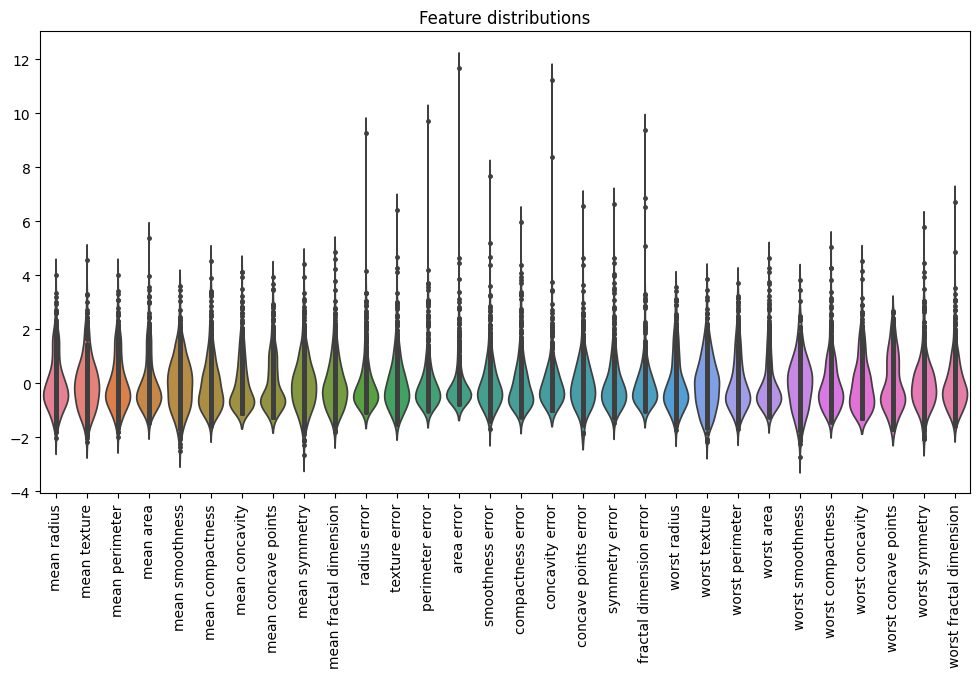

In [137]:


plt.figure(figsize=(12,6))
sns.violinplot(data=X_train_scaled, inner="point", scale="width")
plt.xticks(rotation=90)
plt.title("Feature distributions")
plt.show()

We see from the description of the scaled input variables that the mean have now gone down to 0 and that the standard deviation is 1. The plot also shows that most of the data is alligned and similar, which should make training with SVM and regression much more stable. We can then conclude that the features that are standardized are mure suitable for further usage.

## Q1.3 Comment on importance of three way split with respect to hyperparameter search and robustness of any learned model.

Hyperparameters are settings we choose before any training and controls how the learning process is performed. This can be parameters like learning rate, batch rate, regularization parameters or even layers/neurons in deep neural nets. This directly affect how you model turns out and its performance. To get the best hyperparameters we need to test different one to find the ones that yields the best results. To do this we need to have a seperate set of the data to test against and check the models performance. If we were to use the test set, we would break the norm of leaving the test set untouched until the end. This is because we would effectively tweak the model and train if after the testing set. The solution to this is then to create another split from the training data into a validation set. We will then use this validation set to evaluate the model during training and use the result for tweaking of the model to achieve the best result. This will result in a more robust model, because it prevents overfitting, because we will in the end have a dataset that the model have not have any interaction with to test its real performance to unseen data.

In [138]:
X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2, stratify=target, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [455, 569]